<center> <img src = 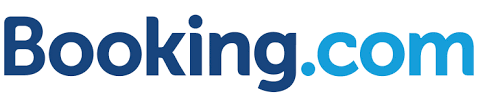 alt="drawing" style="width:400px;">

# <center>  Проект: Прогнозирование рейтинга отелей на Booking

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# фиксируем RANDOM_SEED, чтобы наши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [3]:
# Подгрузим наши данные из соревнования
# DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv('data/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv('data/hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv('data/submission.csv') # самбмишн

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [6]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [8]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [5]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [7]:
# для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, поэтому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

C:\Users\Андрей\AppData\Local\Temp\ipykernel_19008\1331772714.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


# 1. Знакомство с данными

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

- данные представлены типами int, float, object
- признак review_date представлен типом object, в дальнейшем изменим тип на datetime
- есть пропуски в столбцах lat и lng, заполним пропуски позже

In [13]:
# посмотрим описательную статистику числовых признаков
data.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,sample,reviewer_score
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,49.442439,2.823803,0.749999,6.297672
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,3.466325,4.579425,0.433014,3.902295
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,41.328376,-0.369758,0.000000,0.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,48.214662,-0.143372,0.250000,0.625000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,51.499981,0.010607,1.000000,7.900000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,51.516288,4.834443,1.000000,9.600000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,52.400181,16.429233,1.000000,10.000000


In [14]:
# пропущенные значения в процентах
cols_null_percent = data.isnull().mean() * 100 
cols_with_null = cols_null_percent[cols_null_percent > 0]
display(cols_with_null)

lat    0.633655
lng    0.633655
dtype: float64

In [15]:
# дублирующиеся записи
mask = data.duplicated()
data_duplicates = data[mask]
print(f'Число полных дубликатов: {data_duplicates.shape[0]}')

Число полных дубликатов: 336


Text(0, 0.5, 'Средний балл отеля')

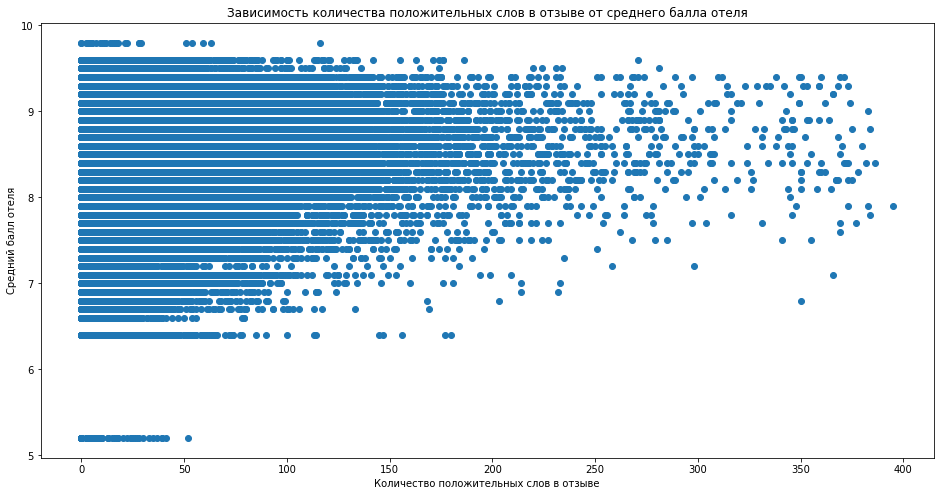

In [16]:
# построим диаграмму рассеяния зависимости количества положительных слов в отзыве от оценки рецензента
plt.figure(figsize=(16, 8))
plt.scatter(data['review_total_positive_word_counts'], data['average_score'])
plt.title('Зависимость количества положительных слов в отзыве от среднего балла отеля')
plt.xlabel('Количество положительных слов в отзыве')
plt.ylabel('Средний балл отеля')

Из графика прослеживается зависимость: с увеличением количества положительных слов в отзыве растет оценка

# 2. Создание признаков, очистка данных
Изучим подробнее признаки, представленные типом данных object, и создадим новые признаки. Заполним пропуски.

## 2.1 Признак hotel_address

In [17]:
# посмотрим выборочно на структуру признака
print(data['hotel_address'].iloc[0])
print(data['hotel_address'].iloc[2])
print(data['hotel_address'].iloc[1257])
print(data['hotel_address'].iloc[14579])
print(data['hotel_address'].iloc[17950])
print(data['hotel_address'].iloc[28990])

Via Senigallia 6 20161 Milan Italy
Mallorca 251 Eixample 08008 Barcelona Spain
1 Impasse Marteau 18th arr 75018 Paris France
1 8 Russell Square Camden London WC1B 5BE United Kingdom
5 Curzon St Westminster Borough London W1J 5HL United Kingdom
K rntner Stra e 22 01 Innere Stadt 1010 Vienna Austria


- Последнее слово в строке - это название страны, для Великобритании - два последних слова. Извлечем название страны в отдельный признак.
- На втором месте с конца строки находится название города. Исключение для Великобритании: название города стоит на пятом месте с конца. Извлечем название города и создадим новый признак.

In [18]:
# функция для извлечения названия страны
def get_country(address):
    """Извлекает из входной строки название страны.

    Args:
        address (str): Строка, содержащая информацию с названием страны.

    Returns:
        str: Название страны
    """
    word_list = address.split(' ') # разбиваем строку по пробелу
    if word_list[-1] == 'Kingdom':
        return word_list[-2] + ' ' + word_list[-1]
    return word_list[-1]

In [19]:
# создаем признак country
data['country'] = data['hotel_address'].apply(get_country)

In [20]:
# функция для извлечения названия города
def get_city(address):
    """Извлекает из входной строки название города

    Args:
        address (str): Строка, содержащая информацию с названием города.

    Returns:
        str: Название города
    """
    word_list = address.split(' ') # разбиваем по пробелу строку с адресом
    if word_list[-1] == 'Kingdom':
        return word_list[-5]
    return word_list[-2] # возвращаем второй с конца элемент

In [21]:
# применяем функцию и создаем признак city
data['city'] = data['hotel_address'].apply(get_city)

In [22]:
# уникальные значения стран и городов
print(data['country'].unique())
print(data['city'].unique())

['Italy' 'Netherlands' 'Spain' 'United Kingdom' 'France' 'Austria']
['Milan' 'Amsterdam' 'Barcelona' 'London' 'Paris' 'Vienna']


В датасете представлено 6 стран, 6 городов. Для каждой страны свой город. Один из признаков country или city впоследствии я думаю будет лишним. 

In [23]:
# подготовка данных для визуализации
df = data.groupby('city', as_index=False)['total_number_of_reviews'].sum()
df

,city,total_number_of_reviews
0,Amsterdam,195743618
1,Barcelona,139005786
2,London,783717062
3,Milan,129388482
4,Paris,76381850
5,Vienna,90816216


Text(0, 0.5, 'Количество отзывов')

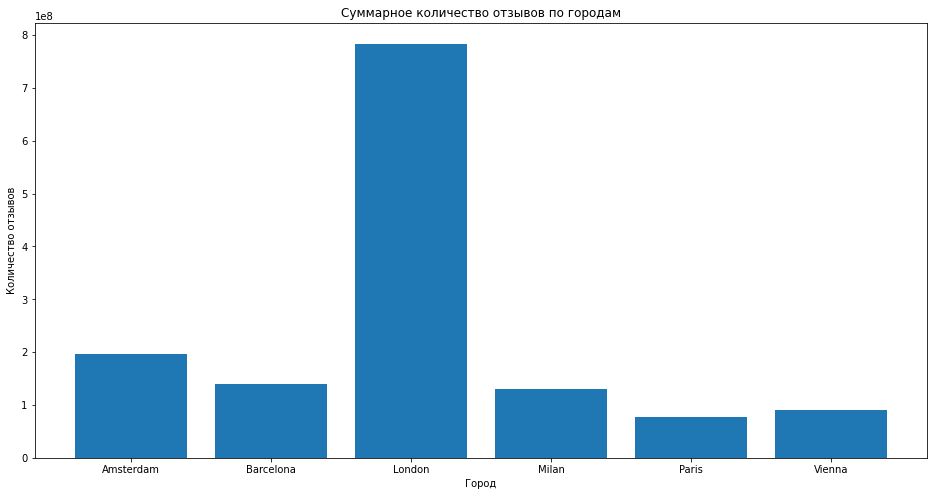

In [24]:
# строим график: суммарное количество отзывов по городам
plt.figure(figsize=(16, 8))
plt.bar(x = df['city'], height=df['total_number_of_reviews'])
plt.title('Суммарное количество отзывов по городам')
plt.xlabel('Город')
plt.ylabel('Количество отзывов')

Из графика можно сделать вывод о популярности отелей Лондона. Этим отелям чаще оставляют отзывы, что косвенно указывает, что их чаще посещают.

## 2.2 Заполнение пропусков  
Заполним пропуски в столбцах lat и lng средним для соответствующего города.

In [25]:
# для каждого города заполняем пропуски в признаках lat и lng средним
for city in data['city'].unique():
    mask = data['city'] == city
    data.loc[mask, 'lat'] = data[mask]['lat'].fillna(data[mask]['lat'].mean())
    data.loc[mask, 'lng'] = data[mask]['lng'].fillna(data[mask]['lng'].mean())

In [26]:
# проверяем, что пропусков нет
display(data.isnull().mean())
display(data.head(2))

hotel_address                                 0.0
additional_number_of_scoring                  0.0
review_date                                   0.0
average_score                                 0.0
hotel_name                                    0.0
reviewer_nationality                          0.0
negative_review                               0.0
review_total_negative_word_counts             0.0
total_number_of_reviews                       0.0
positive_review                               0.0
review_total_positive_word_counts             0.0
total_number_of_reviews_reviewer_has_given    0.0
tags                                          0.0
days_since_review                             0.0
lat                                           0.0
lng                                           0.0
sample                                        0.0
reviewer_score                                0.0
country                                       0.0
city                                          0.0


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score,country,city
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0.0,Italy,Milan
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,0.0,Netherlands,Amsterdam


## 2.3 Признак review_date

Тип признака - object, преобразуем в тип данных datetime.

In [27]:
# преобразование к datetime
data['review_date'] = pd.to_datetime(data['review_date'], yearfirst = True)

In [28]:
# создадим новый признак - месяц написания отзыва
data['review_month'] = data['review_date'].dt.month

In [29]:
# удаляем признак с типом datetime
data.drop('review_date', axis=1, inplace=True)

## 2.4 Признак hotel_name

In [30]:
# описание признака
display(data['hotel_name'].describe())

count                                         515738
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: hotel_name, dtype: object

In [31]:
# выборочно посмотрим на содержимое признака в каждой стране
print(data[data['country'] == 'United Kingdom']['hotel_name'].unique()[:20])
print(data[data['country'] == 'Italy']['hotel_name'].unique()[:20])
print(data[data['country'] == 'Netherlands']['hotel_name'].unique()[:20])
print(data[data['country'] == 'Spain']['hotel_name'].unique()[:20])
print(data[data['country'] == 'France']['hotel_name'].unique()[:20])
print(data[data['country'] == 'Austria']['hotel_name'].unique()[:20])

['Holiday Inn London Bloomsbury' 'Holiday Inn London Wembley'
 'Novotel London West' 'St George Hotel' 'The Grosvenor'
 'Hyatt Regency London The Churchill' 'TheWesley' 'Rafayel Hotel Spa'
 'Holiday Inn London Camden Lock' 'The Montcalm At Brewery London City'
 'Copthorne Tara Hotel London Kensington' 'The Chamberlain'
 'Millennium Gloucester Hotel London' 'Hazlitt s'
 'Park Plaza London Riverbank' 'Strand Palace Hotel'
 'DoubleTree by Hilton Hotel London Tower of London'
 'St Martins Lane A Morgans Original' 'COMO Metropolitan London'
 'Hilton London Euston']
['Hotel Da Vinci' 'Hotel Principe Di Savoia' 'Barcel Milan'
 'Best Western Atlantic Hotel' 'Uptown Palace' 'Hotel Mozart'
 'Hotel Berna' 'Nhow Milan' 'Rosa Grand Milano Starhotels Collezione'
 'Brunelleschi Hotel' 'Best Western Hotel Ascot' 'The Hub Hotel'
 'IH Hotels Milano Gioia' 'Hotel degli Arcimboldi'
 'Mokinba Hotels Baviera' 'ADI Doria Grand Hotel'
 'Baglioni Hotel Carlton The Leading Hotels of the World'
 'Starhotels Echo

Можно заметить, что в названиях отелей встречаются названия брендов крупных гостиничных сетей, например Hilton, Radisson Blu, Mercure, Four Seasons, Hyatt. Используем эту информацию для создания новых признаков.  
Еще встречаются пропущенные буквы в названиях, например: 'K K H tel Cayr Saint Germain des Pr s', 'Mill sime H tel', 'Catalonia Passeig de Gr cia 4 Sup'. В идеальном решении нужно восстанавливать все недостающие буквы.

In [32]:
brand_list = ['Hilton', 'Radisson', 'Mercure', 'Hyatt', 'Marriott', 'Holiday', 'Seasons']
def get_brand(hotel):
    for word in hotel.split(' '):
        if word in brand_list:
            return word
    return 'other'

In [33]:
# создадим новый признак hotel_brand
data['hotel_brand'] = data['hotel_name'].apply(get_brand)

In [34]:
data['hotel_brand'].unique()

array(['other', 'Hilton', 'Holiday', 'Hyatt', 'Mercure', 'Seasons',
       'Radisson', 'Marriott'], dtype=object)

## 2.5 Признак reviewer_nationality

In [35]:
# описание признака
display(data['reviewer_nationality'].describe())

count               515738
unique                 227
top        United Kingdom 
freq                245246
Name: reviewer_nationality, dtype: object

In [36]:
# выборочно посмотрим на содержимое признака
print(data['reviewer_nationality'].unique()[:10])

[' United Kingdom ' ' Belgium ' ' Sweden ' ' United States of America '
 ' Ecuador ' ' Netherlands ' ' Ireland ' ' Canada ' ' Norway '
 ' Bulgaria ']


Создадим признак-индикатор, показывающий является ли человек, оставивший отзыв, гражданином страны, где находится оцениваемый отель. Сравним признаки country и reviewer_nationality. При совпадении запишем 1, в противном случае 0. Обратим внимание, что значение признака reviewer_nationality отделено пробелами с обеих сторон.

In [37]:
# создадим временный признак new_nationality, избавившись от лишних пробелов
regex = "[^'\s][\w\s]+[^'\s]"
data['new_nationality'] = data['reviewer_nationality'].str.findall(regex).str.get(0)
print(data['new_nationality'].unique()[:10])

['United Kingdom' 'Belgium' 'Sweden' 'United States of America' 'Ecuador'
 'Netherlands' 'Ireland' 'Canada' 'Norway' 'Bulgaria']


In [38]:
# cоздадим новый признак is_citizen
data['is_citizen'] = np.where(data['country']==data['new_nationality'], 1, 0)
# удалим временный признак new_nationality
data.drop('new_nationality', axis=1, inplace=True)

## 2.6 Признак negative_review

In [39]:
# описание признака
data['negative_review'].describe()

count          515738
unique         330011
top       No Negative
freq           127890
Name: negative_review, dtype: object

In [40]:
# смотрим структуру негативных отзывов
data['negative_review'].unique()[0:7]

array([' Would have appreciated a shop in the hotel that sold drinking water etc but not necessity Would recommend if like us you arrive late at night to bring drinks from plane airport as there s no shop nearby There is a minibar though if you want to pay those prices ',
       ' No tissue paper box was present at the room', ' Pillows ',
       'No Negative', ' They don t have free wifi',
       ' Room generally a bit shabby with some lack of maintenance Some crumbs on bedroom floor these issues did not spoil our minibreak It would be nice to have vegetarian sausages available for breakfast ',
       ' Executive rooms 9th Floor don t have a bath Their website made it look like all rooms did have one and when being at the end of a hall there s no wifi connection possible Mind that during my first two stays here I did have a perfect wifi connection '],
      dtype=object)

Было бы полезно извлечь из отзывов по ключевым словам степень недовольства клиента отеля в числовом выражении 

In [41]:
# установка библиотеки
!pip install -U nltk

     |████████████████████████████████| 1.5 MB 904 kB/s            
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [42]:
#  импорт библиотеки
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
# проверим работу библиотеки выборочно на двух отзывах
rev1 = data['negative_review'].loc[1]
rev2 = data['negative_review'].loc[60]
score1 = sent_analyzer.polarity_scores(rev1)
score2 = sent_analyzer.polarity_scores(rev2)
print(f'{rev1}:\nScore1:\n{score1}')
print(f'{rev2}:\nScore2:\n{score2}')

 No tissue paper box was present at the room:
Score1:
{'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'compound': -0.296}
 It was a shame that the bar area was being refurbished at the time of our stay:
Score2:
{'neg': 0.171, 'neu': 0.829, 'pos': 0.0, 'compound': -0.4767}


Создадим 4 новых признака со значениями характера отзыва на основании признака negative_reviews

In [44]:
data['negative_neg'] = data['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['neg'])
data['negative_neu'] = data['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['neu'])
data['negative_pos'] = data['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['pos'])
data['negative_com'] = data['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

## 2.7 Признак positive_review

In [45]:
# смотрим структуру позитивных отзывов
data['positive_review'].unique()[10:20]

array([' Free upgrade in Executive Double room complementary daily access to the Spa area Modern design Big and cozy room Open space between bathroom and bedroom is a great concept suitable for a couple Free parking option available Easy to reach from highway ',
       ' The location breakfast friendly staff nice rooms',
       ' Top location near Amsterdam Central Urban room was perfect and everything was brand new Bed is like heaven Personnel is quite busy but always responsive and friendly ',
       ' The staff was very kind and polite and they quickly took care of all our needs The rooms are very comfortable and the cleanings are perfect ',
       ' Handy location can see it from the Central train station We got a special deal on a suite so had a decent sized room ',
       ' I loved everything about the place The location was good and the staff I can proudly say was very very friendly and helpful to the maximum I will come back God willing ',
       ' Locate ideal clean facility',

Аналогично создадим 4 новых признака со значениями характера отзыва на основании признака positive_reviews

In [46]:
data['positive_neg'] = data['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['neg'])
data['positive_neu'] = data['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['neu'])
data['positive_pos'] = data['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['pos'])
data['positive_com'] = data['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

## 2.8 Признак tags

In [47]:
# смотрим структуру признака tags
data['tags'].unique()[50:70]

array(["[' Business trip ', ' Solo traveler ', ' Double or Twin Room ', ' Stayed 14 nights ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Couple ', ' Queen Room ', ' Stayed 3 nights ']",
       "[' Group ', ' Superior Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Group ', ' Executive Double Room ', ' Stayed 2 nights ']",
       "[' Leisure trip ', ' Couple ', ' Small Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Solo traveler ', ' Classic Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Family with young children ', ' Twin Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Couple ', ' 2 rooms ', ' Stayed 3 nights ', ' Submitted from a mobile device ']",
       "[' Leisure trip ', ' Group ', ' Standard Double Room ', ' Stayed 7 nights ', ' Submitted from a

In [48]:
# преобразуем через регулярное выражение, уберем лишние знаки, создадим новый признак new_tags
regex = "[^'\s][\w\s]+[^'\s]"
data['new_tags'] = data['tags'].str.findall(regex)

In [49]:
data['new_tags']

0         [Leisure trip, Couple, Double Room, Stayed 2 n...
1         [Leisure trip, Group, Triple Room, Stayed 1 ni...
2         [Business trip, Solo traveler, Twin Room, Stay...
3         [Leisure trip, Couple, Ambassador Junior Suite...
4         [Business trip, Solo traveler, Classic Double ...
                                ...                        
515733    [Leisure trip, Group, Club Double or Twin Room...
515734    [Leisure trip, Couple, Standard Double Room, S...
515735    [Business trip, Solo traveler, Single Room, St...
515736    [Leisure trip, Solo traveler, Deluxe Double Ro...
515737    [Leisure trip, Couple, Bunk Bed Room, Stayed 4...
Name: new_tags, Length: 515738, dtype: object

In [50]:
# функция для отбора всех тегов в список
tag_list = []
def get_tag(tags):
    """Итерируется по элементам списка с тегами и помещает все теги в список

    Args:
        tags (str): Строка, содержащая список с тегами

    Returns:
        str: список с тегами
    """
    for tag in tags:
        tag_list.append(tag)
    return tag_list

In [51]:
# применим функцию к новому признаку с тегами
data['new_tags'].apply(get_tag)

0         [Leisure trip, Couple, Double Room, Stayed 2 n...
1         [Leisure trip, Couple, Double Room, Stayed 2 n...
2         [Leisure trip, Couple, Double Room, Stayed 2 n...
3         [Leisure trip, Couple, Double Room, Stayed 2 n...
4         [Leisure trip, Couple, Double Room, Stayed 2 n...
                                ...                        
515733    [Leisure trip, Couple, Double Room, Stayed 2 n...
515734    [Leisure trip, Couple, Double Room, Stayed 2 n...
515735    [Leisure trip, Couple, Double Room, Stayed 2 n...
515736    [Leisure trip, Couple, Double Room, Stayed 2 n...
515737    [Leisure trip, Couple, Double Room, Stayed 2 n...
Name: new_tags, Length: 515738, dtype: object

In [52]:
# наиболее часто встречающиеся теги
from collections import Counter
Counter(tag_list).most_common(85)

[('Leisure trip', 417778),
 ('Submitted from a mobile device', 307640),
 ('Couple', 252294),
 ('Stayed 1 night', 193645),
 ('Stayed 2 nights', 133937),
 ('Solo traveler', 108545),
 ('Stayed 3 nights', 95821),
 ('Business trip', 82939),
 ('Group', 65392),
 ('Family with young children', 61015),
 ('Stayed 4 nights', 47817),
 ('Double Room', 35207),
 ('Standard Double Room', 32248),
 ('Superior Double Room', 31393),
 ('Family with older children', 26349),
 ('Deluxe Double Room', 24823),
 ('Double or Twin Room', 22393),
 ('Stayed 5 nights', 20845),
 ('Standard Double or Twin Room', 17483),
 ('Classic Double Room', 16989),
 ('Superior Double or Twin Room', 13570),
 ('2 rooms', 12393),
 ('Stayed 6 nights', 9776),
 ('Standard Twin Room', 9745),
 ('Single Room', 9670),
 ('Twin Room', 8321),
 ('Stayed 7 nights', 7399),
 ('Executive Double Room', 6425),
 ('Classic Double or Twin Room', 6107),
 ('Superior Twin Room', 6064),
 ('Deluxe Double or Twin Room', 5998),
 ('Club Double Room', 5908),
 ('Qu

In [53]:
#  создадим бинарные признаки по тегам Stay 1...7 nights 
data['1_night'] = data['new_tags'].apply(lambda x: 1 if 'Stayed 1 night' in x else 0)
data['2_nights'] = data['new_tags'].apply(lambda x: 1 if 'Stayed 2 nights' in x else 0)
data['3_nights'] = data['new_tags'].apply(lambda x: 1 if 'Stayed 3 nights' in x else 0)
data['4_nights'] = data['new_tags'].apply(lambda x: 1 if 'Stayed 4 nights' in x else 0)
data['5_nights'] = data['new_tags'].apply(lambda x: 1 if 'Stayed 5 nights' in x else 0)
data['6_nights'] = data['new_tags'].apply(lambda x: 1 if 'Stayed 6 nights' in x else 0)
data['7_nights'] = data['new_tags'].apply(lambda x: 1 if 'Stayed 7 nights' in x else 0)

In [54]:
# создадим бинарные признаки еще по нескольким тегам
data['couple'] = data['new_tags'].apply(lambda x: 1 if 'Couple' in x else 0)
data['solo'] = data['new_tags'].apply(lambda x: 1 if 'Solo traveler' in x else 0)
data['business'] = data['new_tags'].apply(lambda x: 1 if 'Business trip' in x else 0)
data['group'] = data['new_tags'].apply(lambda x: 1 if 'Group' in x else 0)
data['y_children'] = data['new_tags'].apply(lambda x: 1 if 'Family with young children' in x else 0)
data['o_children'] = data['new_tags'].apply(lambda x: 1 if 'Family with older children' in x else 0)


In [55]:
# отдельно выделим теги, описывающие роскошные номера отеля. Эти теги начинаются со слов Deluxe, Luxury
# функция для поиска в тегах слов Deluxe, Luxury
luxe_list = ['Deluxe', 'Luxury']
def get_luxe(tags):
    """Итерируется по элементам списка с тегами и определяет наличие в теге ключевых слов

    Args:
        tags (str): Строка, содержащая список с тегами

    Returns:
        str: 1 или 0
    """
    for tag in tags:
        if tag.split(' ')[0] in luxe_list:
            return 1
    return 0

In [56]:
# создадим бинарный признак, показывающий на основании тега является ли номер отеля роскошным 
data['is_luxe'] = data['new_tags'].apply(get_luxe)

## 2.9 Признак days_since_review

In [57]:
# описание признака
data['days_since_review'].describe()

count     515738
unique       731
top       1 days
freq        2585
Name: days_since_review, dtype: object

In [58]:
# выборочно смотрим структуру признака
data['days_since_review'].loc[:10]

0     13 days
1     234 day
2     616 day
3     656 day
4     444 day
5     721 day
6     350 day
7     723 day
8     404 day
9     673 day
10    559 day
Name: days_since_review, dtype: object

In [59]:
# создадим признак взамен исходного в формате int отбросив текстовую часть
data['days_since_review'] = data['days_since_review'].apply(lambda x: int(x.split(' ')[0]))

# 3. Преобразование признаков

Выполним кодирование номинального категориального признака city и hotel_brand методом *OneHot Encoding*

In [60]:
import category_encoders as ce

In [61]:
encoder = ce.OneHotEncoder(cols=['city', 'hotel_brand']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data[['city','hotel_brand']])
data = pd.concat([data, type_bin], axis=1)

Выполним кодирование номинального категориального признака reviewer_nationality методом *Binary Encoding*

In [62]:
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, type_bin], axis=1)

# 4. Отбор признаков

<AxesSubplot:>

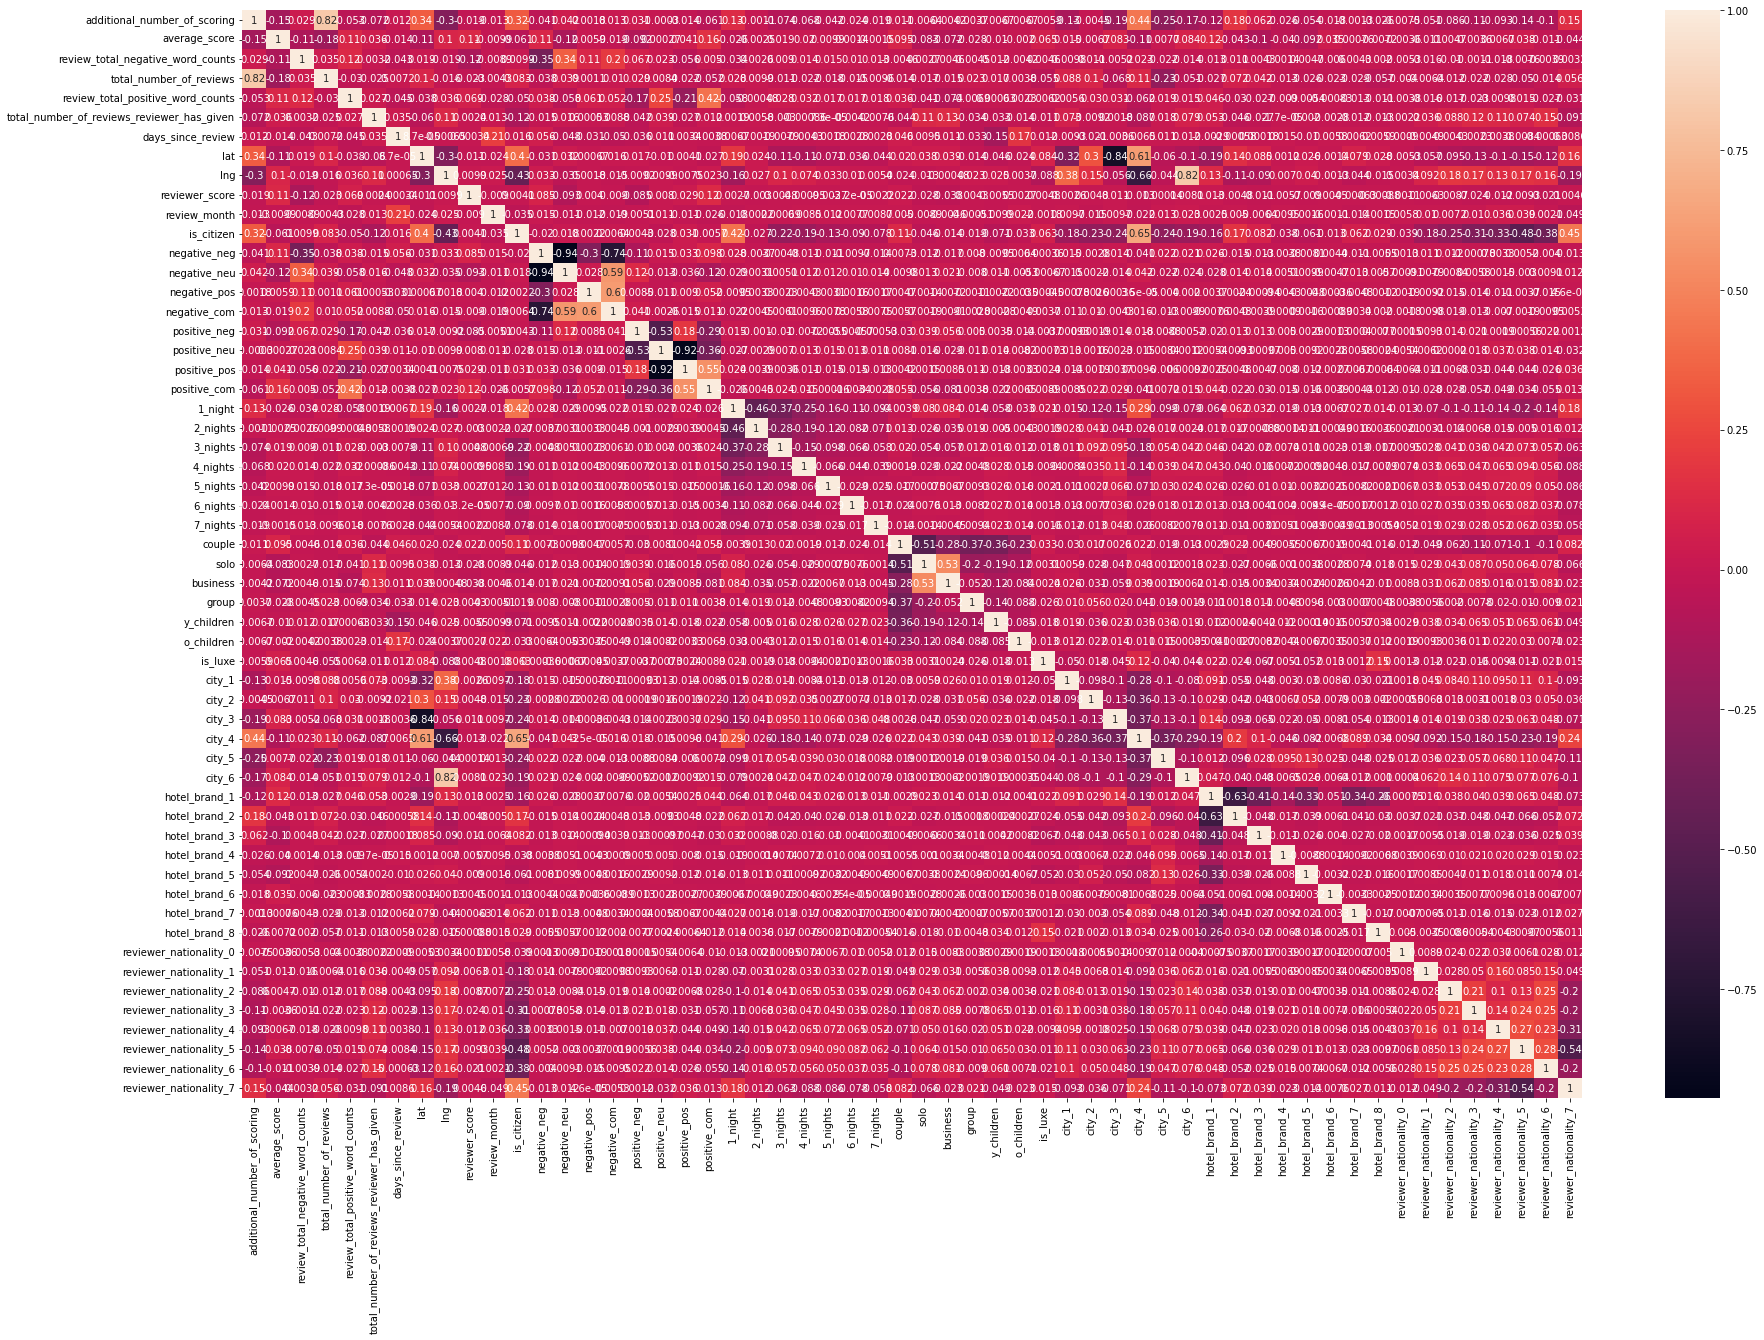

In [63]:
# построим тепловую карту корреляции признаков
plt.rcParams['figure.figsize'] = (30,20)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True, fmt='.2g')

In [64]:
# удаляем признаки с корреляцией > +- 0.7
data.drop([
    'additional_number_of_scoring',
    'lat',
    'lng',
    'negative_neg',
    'positive_neu'
], axis=1,inplace=True)

<AxesSubplot:>

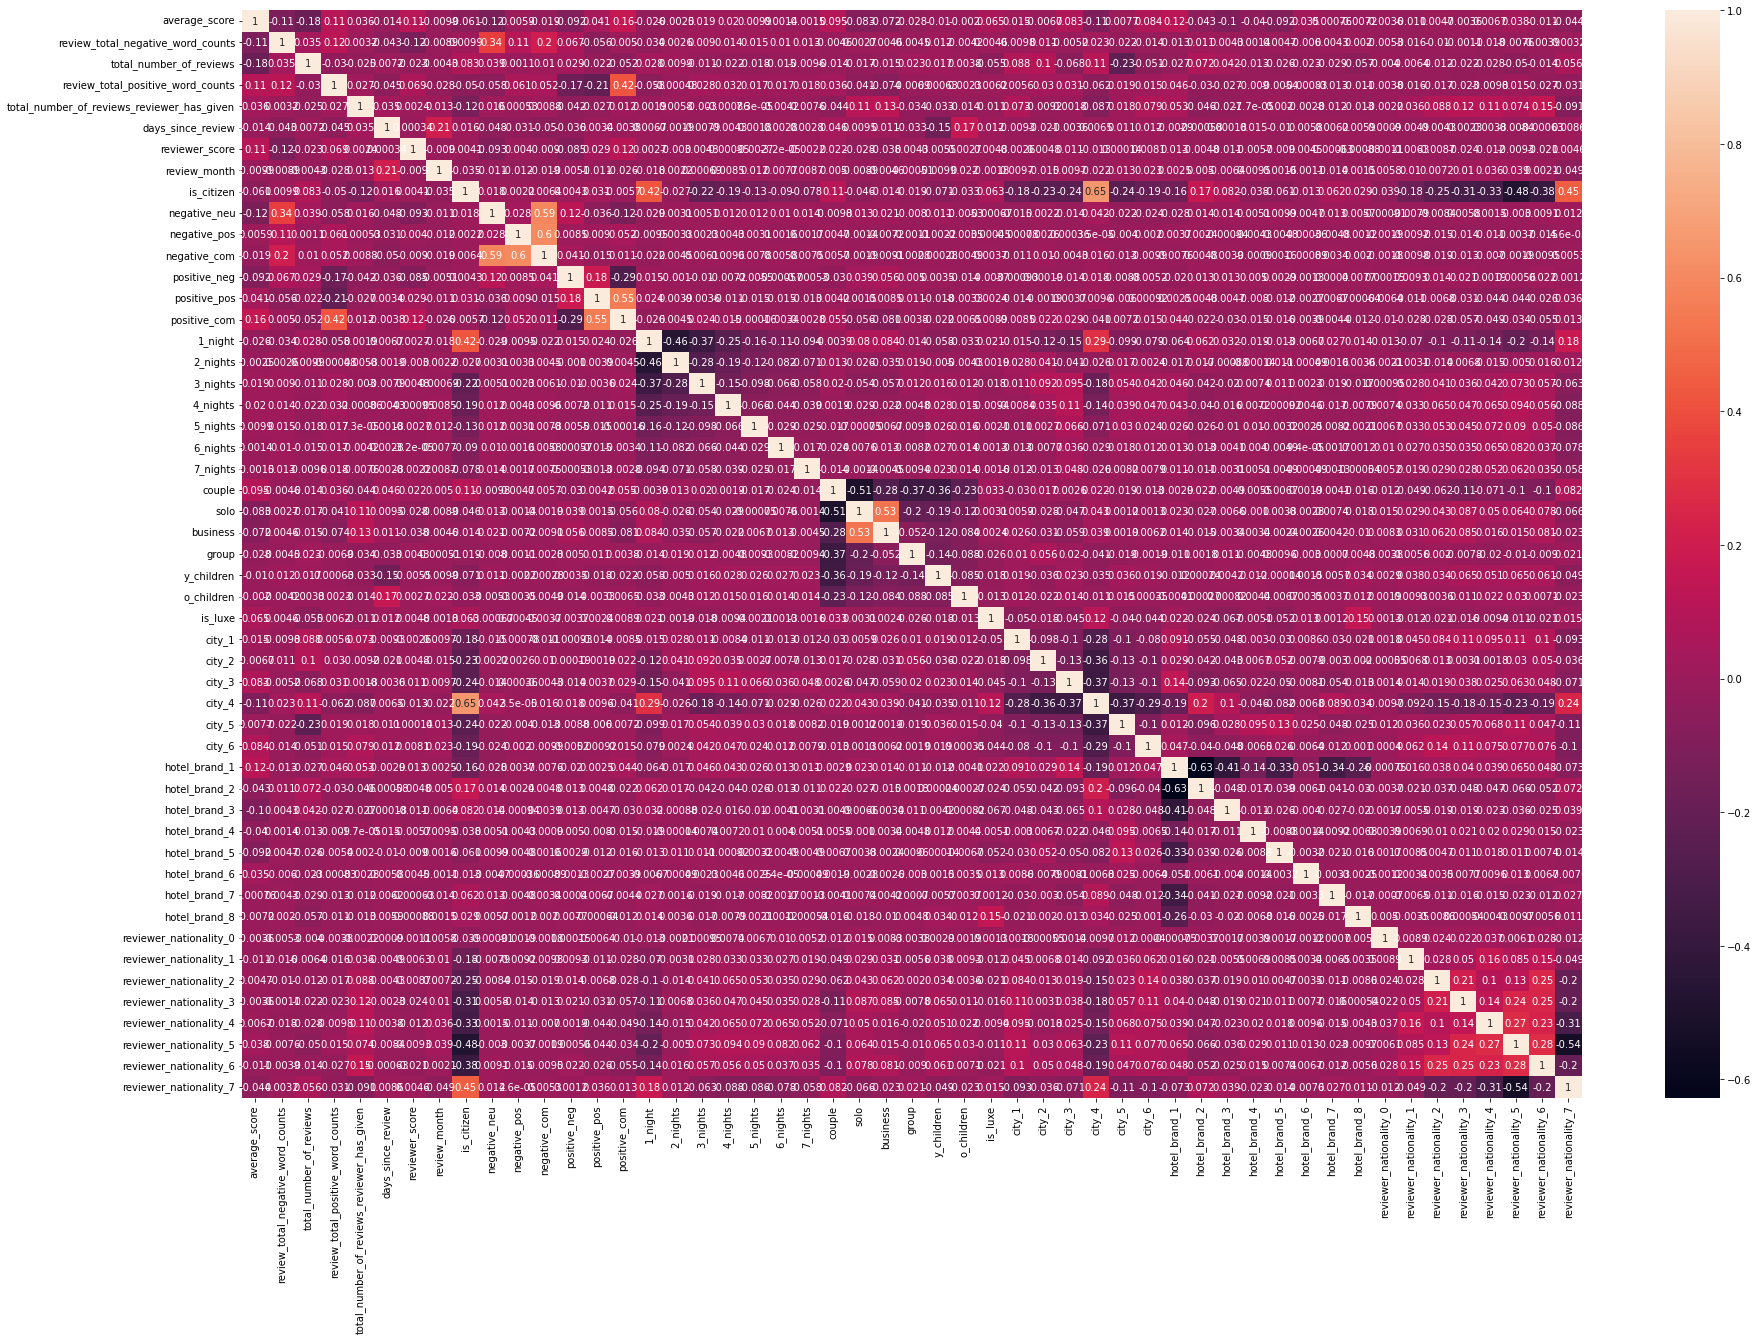

In [65]:
# строим тепловую карту повторно
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

# 5. Обучение модели

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 62 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   average_score                               515738 non-null  float64
 2   hotel_name                                  515738 non-null  object 
 3   reviewer_nationality                        515738 non-null  object 
 4   negative_review                             515738 non-null  object 
 5   review_total_negative_word_counts           515738 non-null  int64  
 6   total_number_of_reviews                     515738 non-null  int64  
 7   positive_review                             515738 non-null  object 
 8   review_total_positive_word_counts           515738 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 

In [67]:
# модель на признаках с dtypes "object" обучаться не будет, просто выберем их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [68]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [69]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [70]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 51), (386803, 51), (386803, 50), (309442, 50), (77361, 50))

In [71]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [72]:
# Создаём модель
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [73]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


In [74]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.8766745905559646


<AxesSubplot:>

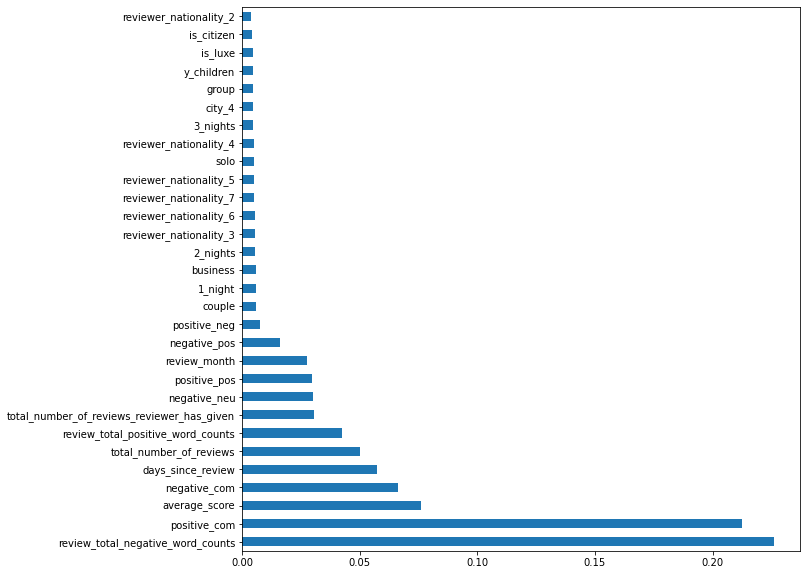

In [75]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [76]:
test_data.sample(10)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,reviewer_score,review_month,is_citizen,negative_neu,...,hotel_brand_7,hotel_brand_8,reviewer_nationality_0,reviewer_nationality_1,reviewer_nationality_2,reviewer_nationality_3,reviewer_nationality_4,reviewer_nationality_5,reviewer_nationality_6,reviewer_nationality_7
64094,8.7,21,5394,3,3,651,0.0,10,1,0.891,...,0,0,0,0,0,0,0,0,0,1
25578,8.8,18,868,17,3,394,0.0,7,0,1.000,...,0,0,0,0,0,0,0,0,0,1
2156,9.4,205,948,13,1,338,0.0,8,0,0.862,...,0,0,0,0,0,0,0,1,0,0
118216,7.6,0,2310,16,1,665,0.0,10,0,0.000,...,0,0,0,0,0,0,0,0,0,1
59484,8.3,18,4684,52,12,208,0.0,1,1,1.000,...,0,0,0,0,0,0,0,0,0,1
54927,8.3,5,1353,3,2,63,0.0,6,0,1.000,...,0,0,0,0,0,0,0,1,0,0
75309,8.5,235,778,80,4,322,0.0,9,0,0.885,...,0,0,0,0,0,0,0,0,0,1
31222,8.7,32,917,0,1,188,0.0,1,0,0.929,...,0,0,0,0,1,0,0,1,0,0
62345,8.3,13,3469,14,1,478,0.0,4,1,0.612,...,0,0,0,0,0,0,0,0,0,1
118308,8.4,19,2902,4,1,424,0.0,6,1,0.805,...,0,0,0,0,0,0,0,0,0,1


In [77]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [78]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [79]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.4s finished


In [80]:
predict_submission

array([8.655, 7.211, 8.552, ..., 8.346, 9.427, 7.181])

In [81]:
list(sample_submission)

['reviewer_score', 'id']

In [82]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission3.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.655,488440
1,7.211,274649
2,8.552,374688
3,9.760,404352
4,9.508,451596
5,9.002,302161
6,8.031,317079
7,7.303,13963
8,8.309,159785
9,7.161,195089
